# Linear Regression | StandardScaler | Data Analizer | Visualization

In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/random-house-price/1553768847-housing.csv


In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

#handle warnings
warnings.filterwarnings('ignore')

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, r2_score
from sklearn.preprocessing import OneHotEncoder

In [79]:
#import datasets
house= pd.read_csv('/kaggle/input/random-house-price/1553768847-housing.csv')

In [80]:
house.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [81]:
house.shape

(20640, 10)

In [82]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [83]:
house.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [84]:
house.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
3512,-118.47,34.26,35,1898,344.0,1123,347,5.5792,<1H OCEAN,218400
11240,-117.95,33.81,33,1724,291.0,943,285,5.1180,<1H OCEAN,195200
6400,-118.05,34.13,23,3264,729.0,1475,668,3.7350,INLAND,218300
511,-122.22,37.82,42,2991,335.0,1018,335,13.4990,NEAR BAY,500001
6800,-118.12,34.09,25,4870,1371.0,3518,1296,3.2307,<1H OCEAN,188400
8280,-118.15,33.78,12,4436,1133.0,2176,1002,3.5812,NEAR OCEAN,198600
16575,-121.43,37.75,34,1280,268.0,754,294,3.1333,INLAND,132000
4784,-118.32,34.03,47,1082,198.0,455,193,3.0132,<1H OCEAN,223200
1899,-120.01,38.89,24,1669,422.0,589,281,3.0089,INLAND,100800
1729,-122.34,37.98,33,2014,410.0,1354,427,3.9773,NEAR BAY,131300


In [85]:
house[house.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value


In [86]:
house.isna().sum()[house.isna().sum() > 0]

total_bedrooms    207
dtype: int64

In [87]:
house= house.dropna()

In [88]:
num_cols= house.select_dtypes(include= 'number').columns

house[num_cols].corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


In [89]:
house[num_cols].cov()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,4.014324,-3.957670,-2.758919,1.991284e+02,5.876851e+01,2.276609e+02,4.328688e+01,-0.059174,-1.049990e+04
latitude,-3.957670,4.563981,0.320091,-1.711788e+02,-6.029962e+01,-2.638746e+02,-5.861970e+01,-0.323087,-3.566933e+04
housing_median_age,-2.758919,0.320091,158.553558,-9.923225e+03,-1.700313e+03,-4.220631e+03,-1.457476e+03,-2.828672,1.547036e+05
total_rooms,199.128445,-171.178818,-9923.224538,4.775403e+06,8.567306e+05,2.122942e+06,7.677502e+05,821.299996,3.362452e+07
total_bedrooms,58.768508,-60.299623,-1700.312817,8.567306e+05,1.775654e+05,4.191391e+05,1.578295e+05,-6.180851,2.416878e+06
population,227.660858,-263.874646,-4220.630517,2.122942e+06,4.191391e+05,1.284161e+06,3.930154e+05,10.947904,-3.309526e+06
households,43.286878,-58.619704,-1457.475788,7.677502e+05,1.578295e+05,3.930154e+05,1.461527e+05,9.754316,2.863815e+06
median_income,-0.059174,-0.323087,-2.828672,8.213000e+02,-6.180851e+00,1.094790e+01,9.754316e+00,3.607307,1.509192e+05
median_house_value,-10499.897668,-35669.333210,154703.602850,3.362452e+07,2.416878e+06,-3.309526e+06,2.863815e+06,150919.151760,1.332539e+10


In [90]:
house['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [91]:
X= house.drop(columns= 'median_house_value')
y= house['median_house_value']

In [92]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 2)

In [93]:
X_train.shape

(16346, 9)

In [94]:
ohe= OneHotEncoder(drop='first',sparse=False)

X_train= ohe.fit_transform(X_train[['ocean_proximity']])
X_test= ohe.transform(X_test[['ocean_proximity']])

In [95]:
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train, y_train)
X_test= scaler.transform(X_test)

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [97]:
dtc= DecisionTreeClassifier(random_state= 0)
dtc.fit(X_train, y_train)



DecisionTreeClassifier(random_state=0)

In [98]:
y_pred2= dtc.predict(X_test)
print(accuracy_score(y_test, y_pred2))

0.04257401517005138


In [99]:
lr= LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [100]:
y_pred= lr.predict(X_test)
print(r2_score(y_test, y_pred))

0.24857986053677295


<Axes: xlabel='housing_median_age', ylabel='Count'>

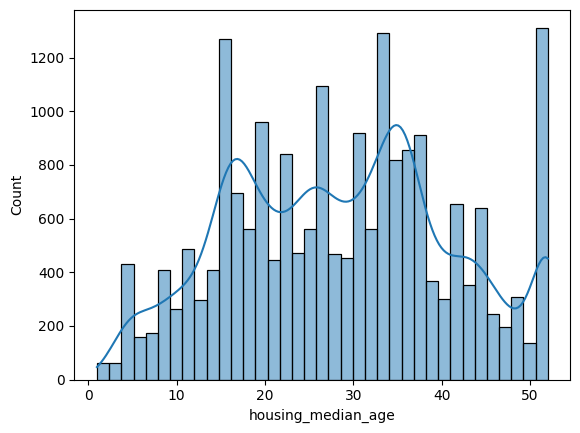

In [101]:
sns.histplot(house['housing_median_age'], kde=True)
